# **1-Laboratory-08-10-2020**

| Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia <br />
| Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## IRIS Dataset
Iris is a particularly famoustoy dataset(i.e. a dataset with a small number of rows and columns, mostlyused for initial small-scale tests and proofs of concept). This specific dataset contains information aboutthe Iris, a genus that includes 260-300 species of plants (you can read more about Iris on Wikipedia). TheIris dataset contains measurements for 150 Iris flowers, each belonging to one of three species: Virginica,Versicolor and Setosa. (50 flowers for each of the three species). These three species all present similarflowers, as you can see in Figure 1.Each of the 150 flowers contained in the Iris dataset is represented by 5 values:
- sepal length, in cm
- sepal width, in cm
- petal length, in cm
- petal width, in cm 
- Iris species, one of: Iris-setosa, Iris-versicolor, Iris-virginica

The dataset is available as a Comma-Separated Values (CSV) file. These files are typically used torepresent tabular data. Each row is represented on one of the lines. Each of the rows contains a fixednumber of columns. Each of the columns (in each row) is separated by a comma (,), hence the name.You can read more about CSV files on Wikipedia.The following are 3 lines taken from the Iris dataset. You should check the contents of the CSV fileyourself to get a sense of what CSV files look like <br />
- .5.0,3.6,1.4,0.2,Iris-setosa<br />
- 6.3,2.3,4.4,1.3,Iris-versicolor<br />
- 7.2,3.0,5.8,1.6,Iris-virginica<br />

<hr /> 

### Questions
1. Load the previously downloaded Iris dataset as a list of lists (each of the 150 lists should have 5 elements). You can make use of the csv module presented. You can read more about the csv module on the official documentation.

In [1]:
import csv

data = [ [], [], [], [], [] ]
head = ["sepal length","sepal width","petal length","petal width"]

with open('../Datasets/iris.csv') as f:
    
    for row in csv.reader(f):
        """
            printing "row" I noticed that the last row is empty
            so I need to get just the ones with 5 attributes
        """
        if len(row) == 5:
            """
                for the other exercise we'll need numbers and not string
                but pay attention that the last element have to remain a string
                
                convert string into float from 0 to 3
                element 4 remains 
            """
                
            for i in range(4):
                data[i].append(float(row[i]))
            
            data[4].append(row[4])

2. Compute and print the mean and the standard deviation for each of the 4 measurement columns(i.e. sepal length and width, petal length and width). Remember that, for a given list ofnvaluesx= (x1,x2,...,xn), the mean μ and the standard deviation σ are defined respectively as <img src="../Bridge/1.jpg" width="128px" height="auto" />

I'll define two function that execute the mean and the standard deviation for each column

In [2]:
def mean(x):
    return sum(x) / len(x)

def standard_deviation(x):
    u = mean(x)
    return (mean([ (x_ - u) ** 2 for x_ in x ])) ** 0.5

for i, m in enumerate(head):
    print("\n\t",head[i])
    print("mean:\t",mean(data[i]))
    print("std:\t",standard_deviation(data[i]))


	 sepal length
mean:	 5.843333333333335
std:	 0.8253012917851409

	 sepal width
mean:	 3.0540000000000007
std:	 0.4321465800705435

	 petal length
mean:	 3.7586666666666693
std:	 1.7585291834055201

	 petal width
mean:	 1.1986666666666672
std:	 0.760612618588172


3. Compute and print the mean and the standard deviation for each of the 4 measurement columns,separately for each of the three Iris species (versicolor, virginica and setosa).

In [4]:
iris_types = ['Iris-versicolor', 'Iris-virginica','Iris-setosa']

for i, m in enumerate(head):
    
    # check every time all the value for each type 
    for iris_t in iris_types:
        
        print(iris_t, end="\t")
        # list with all of iris_t flowers 
        values = []
        for a,b in zip(data[i],data[4]):
            """ 
                if that flower is the same of iris_t
                add it to the list
            """
            if b == iris_t:
                values.append(a)
        
        print(f"\t{mean(values):.5f} \t{standard_deviation(values):.5f}")
    
    print()

Iris-versicolor		5.93600 	0.51098
Iris-virginica		6.58800 	0.62949
Iris-setosa		5.00600 	0.34895

Iris-versicolor		2.77000 	0.31064
Iris-virginica		2.97400 	0.31926
Iris-setosa		3.41800 	0.37719

Iris-versicolor		4.26000 	0.46519
Iris-virginica		5.55200 	0.54635
Iris-setosa		1.46400 	0.17177

Iris-versicolor		1.32600 	0.19577
Iris-virginica		2.02600 	0.27189
Iris-setosa		0.24400 	0.10613



4. (*) Based on the results of exercises 2 and 3, which of the 4 measurements would you considering as being the most characterizing one for the three species? (In other words, which measurementwould you consider “best”, if you were to guess the Iris species based only on those four values?)

Looking at numbers could be difficult for guessing the answer, so I think that plotting these result gained on the previous exercise and see which is the most "anomalous" measure. So it could be done by plotting for each measure both mean and std graph  

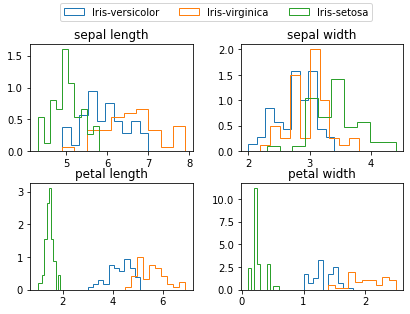

In [61]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
fig.tight_layout()

for i, m in enumerate(head):
    
    for iris_type, color in zip(iris_types, colors):
        
        values = [ v for v,t in zip(data[i], data[4]) if t == iris_type ]
        
        axes[i].hist(values, density=True,histtype='step', stacked=True, fill=False)
        
        axes[i].set_title(m)
    

fig.legend(labels=iris_types, loc="lower center", ncol=3,bbox_to_anchor=(0.5,1))

# center the plot
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Furthermore, it is clear that the most "characteristic" flower among these three is the Iris-setosa

5. (*) Based on the considerations of Exercise 3, assign the flowers with the following measurements to what you consider would be the most likely species.

5.2, 3.1, 4.0, 1.2 <br />
4.9, 2.5, 5.6, 2.0 <br />
5.4, 3.2, 1.9, 0.4 <br />

In this case I'd plot the previous graphs and I'd plot these points inside them, and see how far are they from the highest point of the scatter

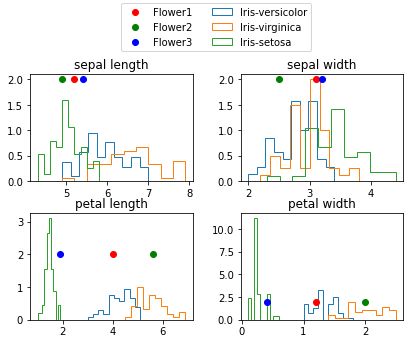

In [113]:
flowers = [[5.2, 3.1, 4.0, 1.2],[4.9, 2.5, 5.6, 2.0],[5.4, 3.2, 1.9, 0.4]]

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
fig.tight_layout()

for i, m in enumerate(head):
    subset = []
    for iris_type, color in zip(iris_types, colors):
        
        values = [ v for v,t in zip(data[i], data[4]) if t == iris_type ]
        
        axes[i].hist(values, density=True,histtype='step', stacked=True, fill=False)
        
        axes[i].set_title(m)
        
    # get the points
    for x,y in enumerate(flowers):
        subset.append(y[i])

    axes[i].plot([subset[0]],[2], marker="o", color="r", ls='') 
    axes[i].plot([subset[1]],[2], marker="o", color="g", ls='')
    axes[i].plot([subset[2]],[2], marker="o", color="b", ls='')
    
legend_lab = ['Flower1','Flower2','Flower3'] + iris_types
fig.legend(labels=legend_lab, loc="lower center", ncol=2,bbox_to_anchor=(0.5,1))

# center the plot
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Analyzing step by step, I can guess that the first flower (the green point) is an Iris-Virginica. The second one (the point in the middle) could be an Iris-Setosa, and the third one should be an Iris-Versicolor

## CITYBIKE Dataset

Citybik.es is a website that offers an Application Programming Interface (or API, for short) for the usage ofbike-sharing services throughout the world. Among the others, data for one of Turin’s bike sharing system([TO]Bike) is available. For [TO]Bike, the information available is at a “station” granularity. This meansthat all the data available regards the bike stations: some of the useful information available is the stationname, its position (in terms of latitude and longitude), the number of available bikes and the number offree docks. The data is offered in near real-time (i.e. it is updated every 15-30 minutes).The API endpoint to request the data about for the [TO]Bike service is the following: http://api.citybik.es/v2/networks/to-bike

<hr />

1. Load the previously downloaded Citybik.es dataset as a Python dictionary. You can make use of the json module presented. You can find the full documentation for the json module here. After thedictionary is loaded, explore its contents from an interactive shell.



In [121]:
import json

with open("../Datasets/to-bike.json") as f:
    dic = json.load(f)
    print(dic.keys())

dict_keys(['network'])


In [122]:
dic["network"].keys()

dict_keys(['company', 'href', 'id', 'location', 'name', 'source', 'stations'])

The most relevant column is "stations". Once it is a list, for seeing the structure, we can just print the first record

In [123]:
dic["network"]["stations"][0]

{'empty_slots': 0,
 'extra': {'number': 2,
  'reviews': 1671,
  'score': 4.6,
  'status': 'online',
  'uid': '251'},
 'free_bikes': 0,
 'id': '15af4cdd63c01ecaf5851e36c8faf608',
 'latitude': 45.082462,
 'longitude': 7.695677,
 'name': 'Bologna',
 'timestamp': '2020-10-08T12:51:38.002000Z'}

2. Count and print the number of active stations (a station is active if its extra.status field is "online")

Before going deeper, let's see how can we access to the first field

In [117]:
dic["network"]["stations"][0]["extra"]["status"]

'online'

There are several ways to solve that question, a possible approach could be the following one

In [118]:
active_station = 0
for i in enumerate(dic["network"]["stations"]):
    """
        the first element is the key's station
    """
    if i[1]["extra"]["status"] == "online":
        active_station += 1
    
print("Online stations:\t", active_station)

Online stations:	 113


Another fancy way could be the following one: 
- The list active_station_V2 will contain 1 for each online station
- sum them up with the sum operator <br />

In this way it can be solved in just one line!

In [119]:
active_stationV2 = sum([ 1 for i in enumerate(dic["network"]["stations"]) if i[1]["extra"]["status"] == "online" ])
print("Online stations V2:\t",active_stationV2)

Online stations V2:	 113


3. Count and print the total number of bikes available (field free_bikes) and the number of free docks(field empty_slots) throughout all stations.

In [120]:
# proceed as before

bikes_available = 0
free_docks = 0

for i in enumerate(dic["network"]["stations"]):
    """
        the first element is the key's station
    """
    bikes_available += i[1]["free_bikes"]
    free_docks += i[1]["empty_slots"]
    
print("Bikes available: ", bikes_available)
print("Free docks: ", free_docks)

Bikes available:  181
Free docks:  669


4. (*) Given the coordinates (latitude, longitude) of a point (e.g.45.074512,7.694419), identify the closest bike station to it that has available bikes. For computing the distance among two points(given their coordinates), you can use the functiondistance_coords()defined in the code snippetbelow (which is an implementation of the great-circle distance):

In [127]:
from math import cos, acos, sin

def distance_coords(lat1, lng1, lat2, lng2):
    """Compute the distance among two points."""
    deg2rad = lambda x: x * 3.141592 / 180 
    lat1, lng1, lat2, lng2 = map(deg2rad, [ lat1, lng1, lat2, lng2 ])
    R = 6378100 # Radius of the Earth, in meters
    return R * acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lng1 - lng2))

Firstly we need a vector containing all the distances and another one containig the IDs of those available stations. After that we can get the index of the "nearest" station and consequently we can get all the information that we need. 

In [154]:
import pprint 

# given latitude and longitude
coordinates = [45.074512,7.694419]

# all the distance between the station and the given location
distances = []
# id of the relative stations' distances
id_stations = []

for i,s in enumerate(dic["network"]["stations"]):
    if s["free_bikes"] > 0 and s["extra"]["status"] == "online":
        id_stations.append(i)
        distances.append(distance_coords(coordinates[0],coordinates[1],s["latitude"],s["longitude"]))

print(f"The nearest station is located at {min(distances):.4f} -unit measure- from you! \n\n ")

station = dic["network"]["stations"][id_stations[distances.index(min(distances))]]
print(f"Detailed information **\n")
pprint.pprint(station)


The nearest station is located at 259.2296 -unit measure- from you! 

 
Detailed information **

{'empty_slots': 9,
 'extra': {'number': 96,
           'reviews': 518,
           'score': 4.4,
           'status': 'online',
           'uid': '346'},
 'free_bikes': 1,
 'id': '38d1439b1df809b01429cd75224c1581',
 'latitude': 45.076832,
 'longitude': 7.694134,
 'name': 'Regio Parco',
 'timestamp': '2020-10-08T12:51:38.002000Z'}


## MNIST dataset

The MNIST dataset is another particularly famous dataset. It contains several thousands of hand-writtendigits (0 to 9). Each hand-written digit is contained in a28×288-bit grayscale image. This means thateach digit has 784 (282) pixels, and each pixel has a value that ranges from 0 (black) to 255 (white).Figure 2 shows one such digit.The dataset can be downloaded from the following URL:https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/mnist_test.csvIn this case, MNIST is represented as a CSV file. Similarly to the Iris dataset, each row of the MNISTdatasets represents a digit. For the sake of simplicity, this dataset contains only a small fraction (10,000digits out of70,000) of the real MNIST dataset, which is known as the MNIST test set (you will learn moreon training and test sets). For each digit, 785 values are available: the first one is the numerical valuedepicted in the image (e.g. for Figure 2 it would be 5). The following 784 columns represent the grayscale image in row-major order

<hr />

1. Load the previously downloaded MNIST dataset. You can make use of the csv module already presented.


In [155]:
import csv

data_mnist = []
numbers = []

with open('../Datasets/mnist_test.csv') as f:
    for cols in csv.reader(f):
        numbers.append(int(cols.pop(0)))
        """ 
            map(int,cols) coverts all the elements of the list from string to int
        """
        data_mnist.append(list(map(int, cols)))

2. Create a function that, given a position 1≤k≤10,000, prints the k^(th) digit of the dataset (i.e. the k^(th) row of the csv file) as a grid of 28×28characters. More specifically, you should map each range of pixel values to the following characters: <br />
• [0,64)→" "<br />
• [64,128)→"."<br />
• [128,192)→"*"<br />
• [192,256)→"#"<br />

The first step is to generate a random value with the random library. Remember that we saved the numbers into the "numbers" list, so we can print the relative number before the grid. 
The grid is not necessary, in fact we can just add a breakline every 28 elements (i % 28 == 0) and then we can plot the corrispective charachter with many if clauses in cascade. 

In [207]:
import random

def print_element(k):
    print("The random value is: \t",k-1)
    print("The k^th number is:\t",numbers[k-1])

    for i,elem in enumerate(data_mnist[k-1]):

        if i % 28 == 0:
            print()
        """
            print(" ... ", end="") allows to print more elements in the same line
        """

        if elem < 64:
            print(" ",end="")
        elif elem < 128:
            print(".",end="")
        elif elem < 192:
            print("*",end="")
        elif elem < 256:
            print("#",end="") 
            
print_element(random.randint(1,10000))

The random value is: 	 8600
The k^th number is:	 1

                            
                            
                            
                            
              .#*           
              *##           
              *##           
              *##           
              *##.          
             .###*          
             *###.          
              ###           
             *##.           
             ###            
             ###            
            *##*            
            *##.            
            ###             
            ###             
           *###             
           ###*             
           ###              
          *##.              
          .##               
                            
                            
                            
                            

3. Compute the Euclidean distance between each pair of the 784-dimensional vectors of the digits at the following positions: 26th,30th,32nd,35th.

Firstly, I'd like to start with a toy example, in order to imporove the script step by step

In [157]:
a = [3,2]
b = [1,1]

d = sum([ (a[i]-b[i])**2 for i in range(len(a))])**0.5

print(d)

2.23606797749979


In [176]:
numbers[34]

7

An intuitive way to execute this calculation is to take the first one and compare it with the following ones, then we take the second one and we compare it with its following and go on..

In [190]:
indexes = [25,29,31,34]

for i in range(len(indexes)):
    for j in range(i+1,len(indexes)):
        
        x = data_mnist[indexes[i]]
        y = data_mnist[indexes[j]]  
        
        z = sum([ (x[k]-y[k])**2 for k in range(len(x))])**0.5
        
        print(f"[ {indexes[i]+1}th , {indexes[j]+1}th ]\t {z:.4f}")
    

[ 26th , 30th ]	 3539.2232
[ 26th , 32th ]	 3556.4200
[ 26th , 35th ]	 3223.2069
[ 30th , 32th ]	 1171.8293
[ 30th , 35th ]	 2531.0034
[ 32th , 35th ]	 2515.5600


4. (*) Based on the distances computed in the previous step and knowing that the digits listed in Exercise 3 are (not necessarily in this order)7,0,1,1, can you assign the correct label to each of the digits of Exercise 3? 

Well, firstly we can just make assumptions based on the euclidean distance. So, because we have two equal we expect that they have the shorter distance. So I guess that the 30th and the 32th are both 1. <br />
Now we need to evaluate the other two values, respectively 7 and 0. Seven is closer to 1, so I can imagine that 0 correspond to the shorter distance between the couples (26th,30th) and (26th,35th). Hence, in my opinion the 26th elementh should be 0 and the 35th should be 7 

In [191]:
[ numbers[indexes[i]] for i in range(len(indexes))]

[0, 1, 1, 7]

5. (*) There are 1,135 1’s and 980 0’s in the dataset. For all 0’s and 1’s separately, count the number of times each of the 784 pixels is black (use 128 as the threshold value). You can do this by building a list Z and a list O, each containing 784 elements, containing respectively the counts for the 0’s andthe 1’s. Z[i] and O[i] contain the number of times the ith pixel was black for either class. For each value i, compute abs(Z[i] - O[i]). The i with the highest value represents the pixel that best separates the digits “0” and “1” (i.e. the pixel that is most often black for one class and white for theother). Where is this pixel located within the grid? Why is it?

In [206]:
# Initialize
Z  = [ 0 for i in range(784) ]
O = [ 0 for i in range(784) ]

# Check 0 and 1
for row, number in zip(data_mnist, numbers):
    if number == 0:
        for i, element in enumerate(row):
            if element >= 128:
                Z[i] += 1
        
    elif number == 1: 
        for i, element in enumerate(row):
            if element >= 128:
                O[i] += 1
        
    else:
        continue

D = [ (a-b) for a,b in zip(Z,O)]

print(f"The pixel with the highest difference is the {D.index(max(D))}th")

The pixel with the highest difference is the 428th


We found the location but we have to understand why. The optimal way to do that is printing both numbers and at the same time it would be useful to print also the 428th pixel, in order to understand the spatial location. Instead of printing a random 1 or a random 0, we could print Z and 0, but in this case we should edit the print function

In [219]:
def print_array(A):

    for i,elem in enumerate(A):

        if i % 28 == 0:
            print()
        """
            print(" ... ", end="") allows to print more elements in the same line
            let's keep the order of that if-else, even if the numbers have different meaning
        """
        if i == 428:
            print("?",end="")
        else: 
            if elem < 64:
                print(" ",end="")
            elif elem < 128:
                print(".",end="")
            elif elem < 192:
                print("*",end="")
            elif elem < 256:
                print("#",end="") 
            else:
                print("%",end="")
            
print_array(Z)
print_array(O)


                            
                            
                            
                            
            .*#%%#*.        
          .*%%%%%%%%#.      
         .#%%%%%%%%%%#.     
        .#%%%%%%%%%%%%#     
       .*%%%%%%%%%%%%%%.    
       *#%%%%%%%%%%%%%%*    
      .#%%%%%%%#*#%%%%%#.   
      *%%%%%%%*...#%%%%%.   
     .#%%%%%%*    *%%%%%*   
     *%%%%%%*     *%%%%%*   
     #%%%%%#.     *%%%%%.   
     #%%?%%*     .#%%%%%.   
     %%%%%%.    .*%%%%%#    
    .%%%%%#.   .*%%%%%%*    
    .%%%%%%*..*#%%%%%%#.    
    .%%%%%%%#%%%%%%%%#.     
     #%%%%%%%%%%%%%%%*      
     .%%%%%%%%%%%%%#*       
      *%%%%%%%%%%%#.        
       .#%%%%%%%#*.         
          ..*...            
                            
                            
                            
                            
                            
                            
                            
             .##***..       
            .#%%%%%#*.      
            *

I think that in the 428th pixel there is the highest difference because it is in the middle section of the 0, so it means that it is covered very often and on the other side, for the 1, it isn't taken at all.